<a href="https://colab.research.google.com/github/LVanessaS/Netflix/blob/main/Netlix_limpieza_y_transformaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#En este notebook se realizará la limpieza y transformación de datos del dataset:
#https://www.kaggle.com/datasets/ariyoomotade/netflix-data-cleaning-analysis-and-visualization



# ***NETFLIX - LIMPIEZA DE DATOS***

**1. EL PROBLEMA DEL NEGOCIO**



*   ¿Cuántos valores nulos encontrás en los datos? ¿Los puedes eliminar?
*  ¿Cuántos valores incompletos encontrás en los datos? ¿Los puedes reemplazar?
*   ¿Podés eliminar columnas que no te aportan información? ¿Cuáles son? ¿Por qué las eliminarías?
*   ¿Qué tipo de dato es la columna “release_year”? ¿Lo podes convertir a integer?
*   La columna “listed_in” contiene diferentes valores separados por coma, ¿Podés crear una columna y quedarte con el primer valor?



**2. EL SET DE DATOS**

La información recolectada por la empresa Netflix se encuentra en un archivo CSV (netflix1.csv) con 8790 filas y 10 columnas.

Las columnas que contiene este archivo son:

1.   "show_id": id (categórica: "s1","s2",...)
2.   "Type": tipo de programa (categórica: "Movie", "TV Show")

1.   "title": título
2.   "director": estado civil

1.   "country": Pais
2.   "date_added": Fecha de adición

1.   "release_year": Fecha de estreno (string)
2.   "rating": Valuación

1.   "duration": duración
2.   "listed_in": Clasificación








**3. UNA PRIMERA MIRADA AL DATASET**

In [1]:
#Importamos las librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Lectura del dataset
df = pd.read_csv('/content/netflix1.csv')

In [2]:
print(df.shape)
df.head()

(8790, 10)


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
# Veamos las variables categóricas y las numéricas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


Gracias a esta información, podemos responder la primera pregunta planteada:

*   ¿Cuántos valores nulos encontrás en los datos? ¿Los puedes eliminar?

Actualmente no hay valores nulos en ninguna columna, por lo que no es necesaria ninguna modificación por el momento.

In [3]:
# Encontrar valores nulos en todo el DataFrame
valores_nulos = df.isnull()

# Resumen de valores nulos por columna
resumen_nulos = valores_nulos.any()

# Mostrar el DataFrame original y el resumen
print("DataFrame Original:")
df
print("\nResumen de Valores Nulos por Columna:")
resumen_nulos

DataFrame Original:

Resumen de Valores Nulos por Columna:


show_id         False
type            False
title           False
director        False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
dtype: bool

# **4. LIMPIEZA**

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

*   Datos faltantes en algunas celdas
*   Columnas irrelevantes (que no responden al problema que queremos resolver)
*   Registros (filas) repetidos
*   Valores extremos (outliers) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
*   Errores tipográficos en el caso de las variables categóricas
*   Elemento de la lista


Al final de este proceso de limpieza deberíamos tener un set de datos íntegro, listo para la fase de Análisis Exploratorio.

## 4.1 Datos faltantes

El dataframe tiene 8790 filas y 10 columnas, según la información arrojada, no hay ningún dato faltante en ninguna de las columnas.

## 4.2 Columnas irrelevantes

Vamos a responder la pregunta:

*   ¿Podés eliminar columnas que no te aportan información? ¿Cuáles son? ¿Por qué las eliminarías?

De momento la única columna poco relevante e útil para las preguntas que estamos resolviendo es "show_id", no nos brinda información relevante.




In [4]:
df = df[['type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in']]

In [6]:
# Conteo de los niveles en las diferentes columnas categóricas
cols_cat = ['type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in']

for col in cols_cat:
  print(f'Columna {col}: {df[col].nunique()} subniveles')

Columna type: 2 subniveles
Columna title: 8787 subniveles
Columna director: 4528 subniveles
Columna country: 86 subniveles
Columna date_added: 1713 subniveles
Columna release_year: 74 subniveles
Columna rating: 14 subniveles
Columna duration: 220 subniveles
Columna listed_in: 513 subniveles


Ninguna columna cuenta con valor único.

Columna 'Country' no aporta nada

## 4.3 Registros (filas) repetidas

In [7]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {df.shape}')
df.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {df.shape}')

Tamaño del set antes de eliminar las filas repetidas: (8790, 9)
Tamaño del set después de eliminar las filas repetidas: (8787, 9)


## 4.4 Valores extremos

No siempre se deben eliminar los outliers porque dependiendo de la variable numérica analizada estos pueden contener información importante.

Creemos gráficas tipo "boxplot" de las columnas numéricas, de hecho, la única variable numérica es "release_year", esta columna almacena el año de publicación de cada programa. Esto responde la pregunta:

*   ¿Qué tipo de dato es la columna “release_year”? ¿Lo podes convertir a integer?


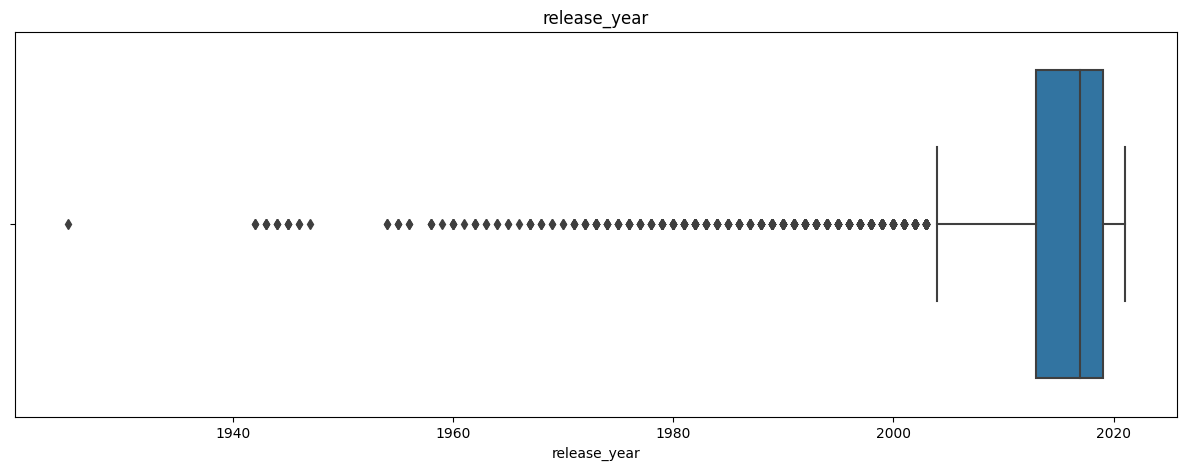

In [8]:
# Generar gráficas individuales pues las variables numéricas
# están en rangos diferentes
cols_num = ['release_year']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df, ax=ax)
    ax.set_title(col)

Si bien es cierto que hay valores de estreno muy antiguos, estos no representan necesariamente un error en la data.

## 4.5 Errores tipográficos

Antes de iniciar la validación de errores tipográficos vamos a transformar la columna: 'listed_in', y de paso vamos a responder la última pregunta planteada:

*   La columna “listed_in” contiene diferentes valores separados por coma, ¿Podés crear una columna y quedarte con el primer valor?

In [9]:
# Divide los valores por comas y aplica explode
df[['listed_in_1','listed_in_2','listed_in_3']] = df['listed_in'].str.split(',', expand=True)



Utilizando la función .split() fuimos capaces de separar la columna en tres diferentes columnas, y finalmente podemos quedarnos con el primer valor.

In [11]:
df = df[[
"type",
"title",
"director",
"country",
"date_added",
"release_year",
"rating" ,
"duration" ,
"listed_in",
"listed_in_1"]]

En una variable categórica pueden aparecer sub-niveles como "unknown" y "UNK" que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes.

Se deben unificar estos sub-niveles

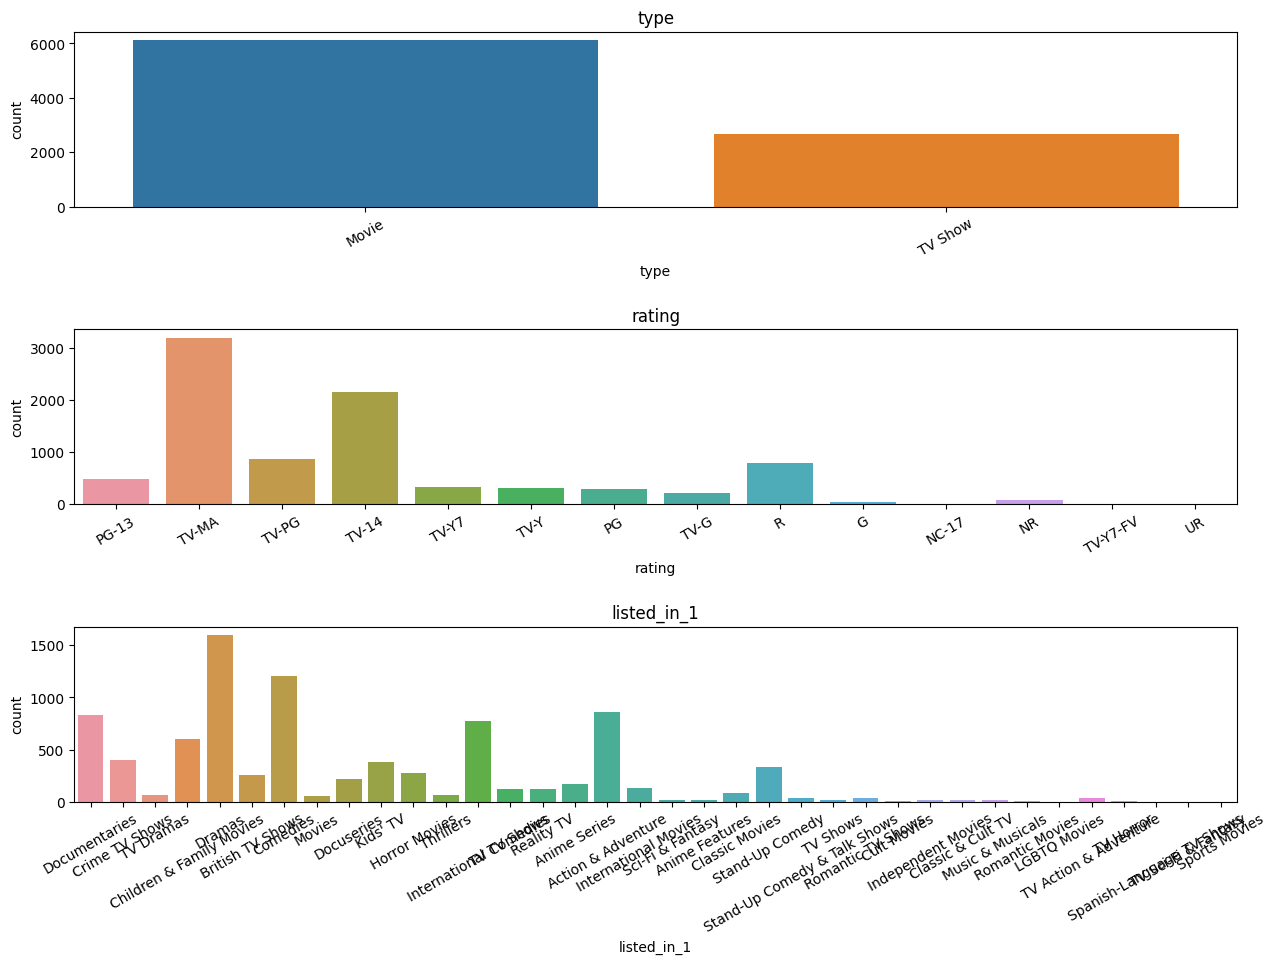

In [18]:
# Graficar los subniveles de cada variable categórica
cols_cat = ['type', 'rating', 'listed_in_1']

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,10))
fig.subplots_adjust(hspace=0.7)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=df, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

Inicialmente se observa que hay sub-niveles con el mismo nombre pero escritos de forma diferente, por lo que vamos a reemplazar estos nombres.

In [ ]:
# listed_in_1: unificar Dramas, Comedies y Sci-Fi & Fantasy. y administrative

df['listed_in_1'] = df['listed_in_1'].str.replace('TV Dramas','Dramas', regex=True)
df['listed_in_1'] = df['listed_in_1'].str.replace('TV Comedies','Comedies', regex=False)
df['listed_in_1'] = df['listed_in_1'].str.replace('TV Sci-Fi & Fantasy','Sci-Fi & Fantasy', regex=False)


Finalizamos la limpieza y transformación de nuestra data!!! 🥳